In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasets = [
        "adult",
        "german",
        "compas",
        "diabetes",
        "breast_cancer",
        ]

attack_list = [
        'deepfool', 
        'carlini_l_2', 
        # 'carlini_l_inf', 
        'lowprofool_l_2', 
        # 'lowprofool_l_inf', 
        # 'fgsm_l_1',
        # 'fgsm_l_2',
        'fgsm_l_inf',
        # 'bim',
        # 'mim',
        # 'pgd_l_1',
        # 'pgd_l_2',
        'pgd_l_inf',

        # 'boundary', 
        # 'hopskipjump_l_2', 'hopskipjump_l_inf'
        ]

def compare_cols(row):
    if row['ground_truth'] != row['adv_prediction']:
        return 1
    else:
        return 0

Dataset: adult

In [3]:
data_list_list=[]
for dataset in ['adult']:
    count_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_svc = f'eval_{folder_name}_svc_result_0.csv'
        result_path_svc = f'./results/{folder_name}/{file_name_svc}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'

        cols = ["age", "capital-gain", "capital-loss", "hours-per-week", "workclass", "education", "marital-status", "occupation", "relationship", 
                "race", "sex", "native-country"]
        input_cols = ["origin_input_age","origin_input_capital-gain","origin_input_capital-loss","origin_input_hours-per-week","origin_input_workclass",
                      "origin_input_education","origin_input_marital-status","origin_input_occupation","origin_input_relationship", "origin_input_race",
                      "origin_input_sex", "origin_input_native-country"]
        adv_cols = ["origin_adv_age","origin_adv_capital-gain","origin_adv_capital-loss","origin_adv_hours-per-week","origin_adv_workclass",
                    "origin_adv_education","origin_adv_marital-status","origin_adv_occupation","origin_adv_relationship", "origin_adv_race",
                    "origin_adv_sex", "origin_adv_native-country"]
        try:
            df1 = pd.read_csv(result_path_lr)
            df2 = pd.read_csv(result_path_svc)
            df3 = pd.read_csv(result_path_nn)
        except:
            continue
        
        # in df1, df2, df3, calculate the cumulative perturbation times for each individual feature 
        # in each row, e.g., if "origin_input_age" is not equal to "origin_adv_age", then add 1 to the cumulative perturbation times of "origin_input_age"
        df1_perturbation_count = [0] * len(input_cols)
        df2_perturbation_count = [0] * len(input_cols)
        df3_perturbation_count = [0] * len(input_cols)

        for i in range(len(input_cols)):
            df1_perturbation_count[i] = df1.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df2_perturbation_count[i] = df2.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df3_perturbation_count[i] = df3.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
        
        # add the cumulative perturbation times of each individual feature to count_list
        count_list.append(df1_perturbation_count)
        count_list.append(df2_perturbation_count)
        count_list.append(df3_perturbation_count)

    # plot a heatmap to show the cumulative perturbation times of each individual feature for each attack using count_list



[[6464 5522 5343 6453   79  452  472  200  328   17   16  193]
 [6464 5590 5382 6454    0    0    0    0    0    0    0    0]
 [6464 5595 5347 6453  987 1032 1096  829  777  648  345 1089]
 [5662 5563 5595 5750    0    8    0    0    0    0    0    0]
 [2224  270  193 1452    0    0    0    0    0    0    0    0]
 [4360 3620 3629 4093    1    4    0    3    0    0    0    3]
 [6464 5522 5343 6453    0    0    0    0    0    0    0    0]
 [6464 5590 5382 6454    0    0    0    0    0    0    0    0]
 [6464 5595 5337 6451    0    0    0    0    0    0    0    0]
 [6464 5522 5343 6453    0    0    0    0    0    0    0    0]
 [6464 5590 5382 6454    0    0    0    0    0    0    0    0]
 [6464 5595 5355 6453    0    0    0    0    0    0    0    0]]


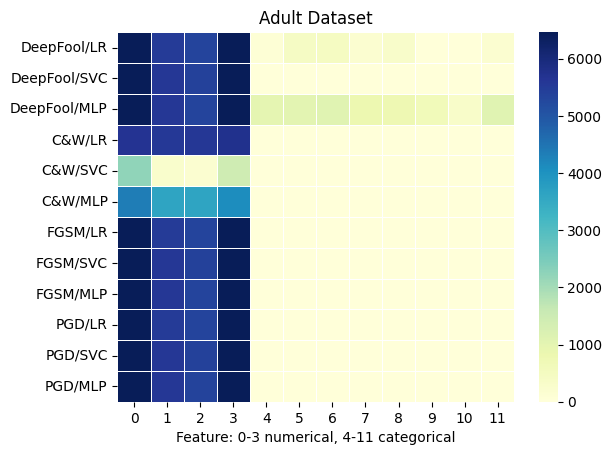

In [7]:
# turn 2d list into heatmap, x-axis is the feature name, y-axis is the attack name

count_list = np.array(count_list)
print(count_list)
ax = sns.heatmap(count_list, cmap="YlGnBu",  linewidth=.7)
# set y-axis labels
# x_labels = ["N", "N", "N", "N", "C", "C", "C", "C", "C", "C", "C", "C"]
y_labels = ["DeepFool/LR", "DeepFool/SVC", "DeepFool/MLP", "C&W/LR", "C&W/SVC", "C&W/MLP", "FGSM/LR", "FGSM/SVC", "FGSM/MLP", "PGD/LR", "PGD/SVC", "PGD/MLP"]
ax.set_yticklabels(y_labels, rotation=0)
# ax.set_xticklabels(x_labels, rotation=0)
ax.set_xlabel('Feature: 0-3 numerical, 4-11 categorical')

# set title
plt.title('Adult Dataset')
plt.savefig('Visualisation/sparsity_adult.png', dpi=300, bbox_inches = 'tight')
plt.show()


Dataset: german

In [8]:
data_list_list=[]
for dataset in ['german']:
    count_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_svc = f'eval_{folder_name}_svc_result_0.csv'
        result_path_svc = f'./results/{folder_name}/{file_name_svc}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'

        input_cols = ["origin_input_duration_in_month","origin_input_credit_amount","origin_input_installment_as_income_perc","origin_input_present_res_since","origin_input_age","origin_input_account_check_status",
                        "origin_input_credit_history","origin_input_purpose","origin_input_savings","origin_input_present_emp_since","origin_input_personal_status_sex","origin_input_other_debtors","origin_input_property",
                        "origin_input_other_installment_plans","origin_input_housing","origin_input_credits_this_bank","origin_input_job","origin_input_people_under_maintenance","origin_input_telephone",
                        "origin_input_foreign_worker"]
        adv_cols = ["origin_adv_duration_in_month","origin_adv_credit_amount","origin_adv_installment_as_income_perc","origin_adv_present_res_since","origin_adv_age","origin_adv_account_check_status",
                    "origin_adv_credit_history","origin_adv_purpose","origin_adv_savings","origin_adv_present_emp_since","origin_adv_personal_status_sex","origin_adv_other_debtors","origin_adv_property",
                    "origin_adv_other_installment_plans","origin_adv_housing","origin_adv_credits_this_bank","origin_adv_job","origin_adv_people_under_maintenance","origin_adv_telephone",
                    "origin_adv_foreign_worker"]

        try:
            df1 = pd.read_csv(result_path_lr)
            df2 = pd.read_csv(result_path_svc)
            df3 = pd.read_csv(result_path_nn)
        except:
            continue
        
        # in df1, df2, df3, calculate the cumulative perturbation times for each individual feature 
        # in each row, e.g., if "origin_input_age" is not equal to "origin_adv_age", then add 1 to the cumulative perturbation times of "origin_input_age"
        df1_perturbation_count = [0] * len(input_cols)
        df2_perturbation_count = [0] * len(input_cols)
        df3_perturbation_count = [0] * len(input_cols)

        for i in range(len(input_cols)):
            df1_perturbation_count[i] = df1.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df2_perturbation_count[i] = df2.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df3_perturbation_count[i] = df3.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
        
        # add the cumulative perturbation times of each individual feature to count_list
        count_list.append(df1_perturbation_count)
        count_list.append(df2_perturbation_count)
        count_list.append(df3_perturbation_count)

    # plot a heatmap to show the cumulative perturbation times of each individual feature for each attack using count_list



[[192 192 126 125 192  23  12  11   2   2   3   1   1   3   2   1   1   1
    0   2]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 132 149 192  39  28  40   6  24  25  10   6  40  24  17  28   3
    4   1]
 [180 181 177 177 179   7   5   7   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 69  62   1   1  39   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [161 163 144 144 153   3   0   0   0   1   0   0   0   0   1   0   0   0
    0   0]
 [192 192 126 125 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 127 146 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 125 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 121 134 192   0   0   0   0   0   0   0   0   0   0   0

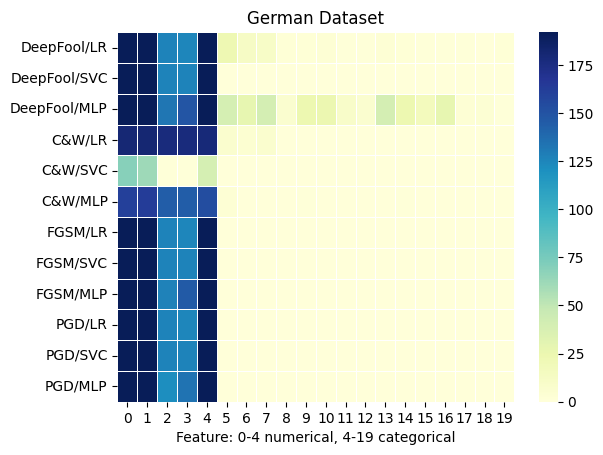

In [9]:
# turn 2d list into heatmap, x-axis is the feature name, y-axis is the attack name

count_list = np.array(count_list)
print(count_list)
ax = sns.heatmap(count_list, cmap="YlGnBu",  linewidth=.7)
# set y-axis labels
# x_labels = ["N", "N", "N", "N", "C", "C", "C", "C", "C", "C", "C", "C"]
y_labels = ["DeepFool/LR", "DeepFool/SVC", "DeepFool/MLP", "C&W/LR", "C&W/SVC", "C&W/MLP", "FGSM/LR", "FGSM/SVC", "FGSM/MLP", "PGD/LR", "PGD/SVC", "PGD/MLP"]
ax.set_yticklabels(y_labels, rotation=0)
# ax.set_xticklabels(x_labels, rotation=0)
ax.set_xlabel('Feature: 0-4 numerical, 4-19 categorical')

# set title
plt.title('German Dataset')

plt.savefig('Visualisation/sparsity_german.png', dpi=300, bbox_inches = 'tight')
plt.show()


Dataset: compas

In [56]:
data_list_list=[]
for dataset in ['compas']:
    count_list = []
    for attack in attack_list:
        folder_name = f'{attack}_{dataset}'
        file_name_lr = f'eval_{folder_name}_lr_result_0.csv'
        result_path_lr = f'./results/{folder_name}/{file_name_lr}'
        file_name_svc = f'eval_{folder_name}_svc_result_0.csv'
        result_path_svc = f'./results/{folder_name}/{file_name_svc}'
        file_name_nn = f'eval_{folder_name}_nn_2_result_0.csv'
        result_path_nn = f'./results/{folder_name}/{file_name_nn}'



        input_cols = ["origin_input_age","origin_input_priors_count","origin_input_days_b_screening_arrest","origin_input_length_of_stay","origin_input_age_cat",
                    "origin_input_sex", "origin_input_race", "origin_input_c_charge_degree", "origin_input_is_recid", "origin_input_is_violent_recid", "origin_input_two_year_recid"]
        adv_cols = ["origin_adv_age","origin_adv_priors_count","origin_adv_days_b_screening_arrest","origin_adv_length_of_stay","origin_adv_age_cat",
                    "origin_adv_sex", "origin_input_race", "origin_adv_c_charge_degree", "origin_adv_is_recid", "origin_adv_is_violent_recid", "origin_adv_two_year_recid"]

        try:
            df1 = pd.read_csv(result_path_lr)
            df2 = pd.read_csv(result_path_svc)
            df3 = pd.read_csv(result_path_nn)
        except:
            continue
        
        # in df1, df2, df3, calculate the cumulative perturbation times for each individual feature 
        # in each row, e.g., if "origin_input_age" is not equal to "origin_adv_age", then add 1 to the cumulative perturbation times of "origin_input_age"
        df1_perturbation_count = [0] * len(input_cols)
        df2_perturbation_count = [0] * len(input_cols)
        df3_perturbation_count = [0] * len(input_cols)

        for i in range(len(input_cols)):
            df1_perturbation_count[i] = df1.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df2_perturbation_count[i] = df2.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
            df3_perturbation_count[i] = df3.apply(lambda x: 1 if x[input_cols[i]] != x[adv_cols[i]] else 0, axis=1).sum()
        
        # add the cumulative perturbation times of each individual feature to count_list
        count_list.append(df1_perturbation_count)
        count_list.append(df2_perturbation_count)
        count_list.append(df3_perturbation_count)

    # plot a heatmap to show the cumulative perturbation times of each individual feature for each attack using count_list



[[192 192 126 125 192  23  12  11   2   2   3   1   1   3   2   1   1   1
    0   2]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 132 149 192  39  28  40   6  24  25  10   6  40  24  17  28   3
    4   1]
 [180 181 177 177 179   7   5   7   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 69  62   1   1  39   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [161 163 144 144 153   3   0   0   0   1   0   0   0   0   1   0   0   0
    0   0]
 [192 192 126 125 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 127 146 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 125 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 126 126 192   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [192 192 121 134 192   0   0   0   0   0   0   0   0   0   0   0

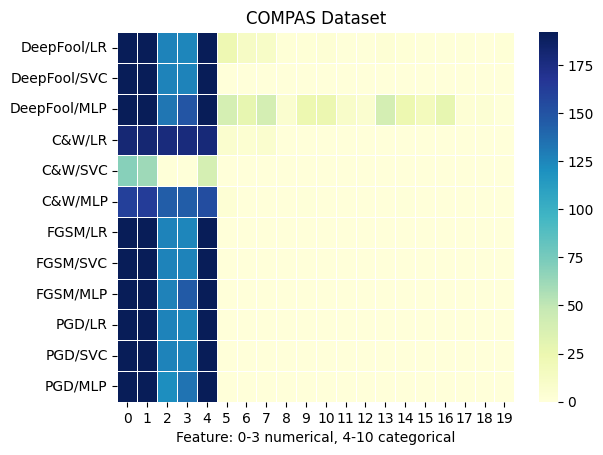

In [10]:
# turn 2d list into heatmap, x-axis is the feature name, y-axis is the attack name

count_list = np.array(count_list)
print(count_list)
ax = sns.heatmap(count_list, cmap="YlGnBu",  linewidth=.7)
# set y-axis labels
# x_labels = ["N", "N", "N", "N", "C", "C", "C", "C", "C", "C", "C", "C"]
y_labels = ["DeepFool/LR", "DeepFool/SVC", "DeepFool/MLP", "C&W/LR", "C&W/SVC", "C&W/MLP", "FGSM/LR", "FGSM/SVC", "FGSM/MLP", "PGD/LR", "PGD/SVC", "PGD/MLP"]
ax.set_yticklabels(y_labels, rotation=0)
# ax.set_xticklabels(x_labels, rotation=0)
ax.set_xlabel('Feature: 0-3 numerical, 4-10 categorical')

# set title
plt.title('COMPAS Dataset')

plt.savefig('Visualisation/sparsity_compas.png', dpi=300, bbox_inches = 'tight')
plt.show()
